In [1]:
import pandas as pd

In [2]:
mp_df = pd.read_csv("data/mp_full.csv")
vp_df = pd.read_csv("data/vp_full.csv")
mp_report_counts = mp_df['misperid'].value_counts()
vp_report_counts = vp_df['misper_misperid'].value_counts()


In [3]:
locations_results = pd.read_csv("/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/results/1/locations.csv")
locations_results = locations_results.drop(locations_results.columns[0], axis=1)
locations_results['count_of_mp_reports'] = locations_results['misperid'].map(mp_report_counts)
locations_results['count_of_vp_reports'] = locations_results['misperid'].map(vp_report_counts)
locations_results['count_of_all_reports'] = locations_results['count_of_mp_reports'] + locations_results['count_of_vp_reports'] 



In [4]:
locations_results['all_truth'] = locations_results['positive'] + locations_results['partial'] + locations_results['missing']
locations_results['result_percentage_exact'] = locations_results['positive'] / locations_results['all_truth']
locations_results['result_percentage_partial'] = locations_results['partial'] / locations_results['all_truth']
locations_results['result_percentage_potential_positive'] = locations_results['potential_positive'] / locations_results['all_truth']

In [5]:
locations_results[locations_results['try_count']!=1]

,potential_positive,positive,partial,missing,insert_all,insert_but_in_text,insert_hallucination,try_count,truth_set,summ_set,misperid,count_of_mp_reports,count_of_vp_reports,count_of_all_reports,all_truth,result_percentage_exact,result_percentage_partial,result_percentage_potential_positive


In [6]:
locations_results['number_of_all_reports_in_a_case'] = locations_results['count_of_all_reports']


Descriptive Statistics:

count    300.000
mean       0.152
std        0.151
min        0.000
25%        0.043
50%        0.125
75%        0.220
max        1.000
Name: result_percentage_exact, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

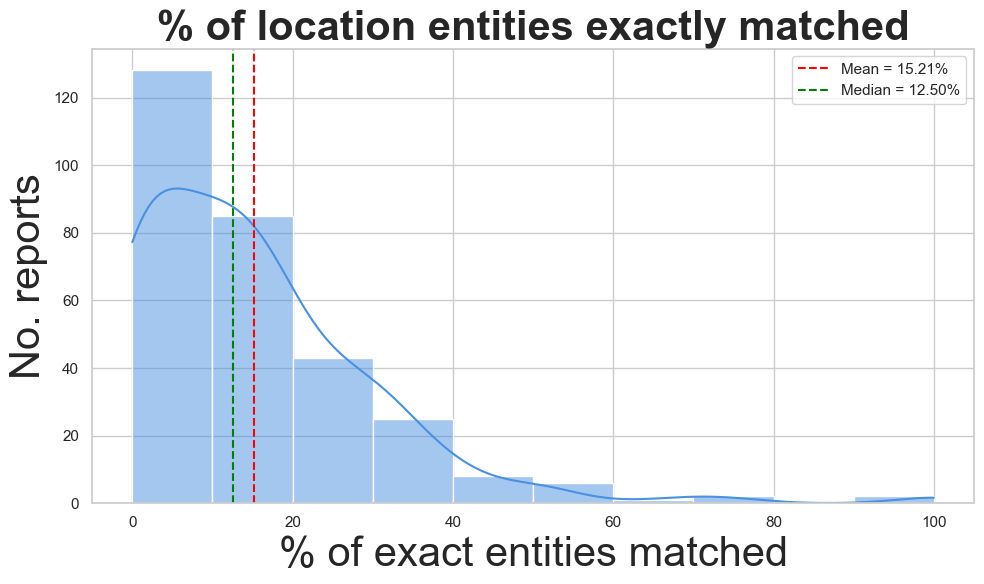

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_distrib(df, col, title):
    desc_stats = locations_results[col].describe()
    print("Descriptive Statistics:\n")
    print(desc_stats.round(3))

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))

    df[col] = df[col]*100
    sns.histplot(df[col], bins=10, kde=True, color="#4A90E2", edgecolor="white")

    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}%')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}%')

    plt.title(title, fontsize=30, weight='bold')
    plt.xlabel("% of exact entities matched", fontsize=30)
    plt.ylabel("No. reports", fontsize=30)
    plt.legend()
    plt.tight_layout()
    
    return plt
plot_distrib(locations_results, 'result_percentage_exact', "% of location entities exactly matched")

Descriptive Statistics:

count    300.000
mean       0.641
std        0.161
min        0.000
25%        0.570
50%        0.667
75%        0.740
max        1.000
Name: result_percentage_partial, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

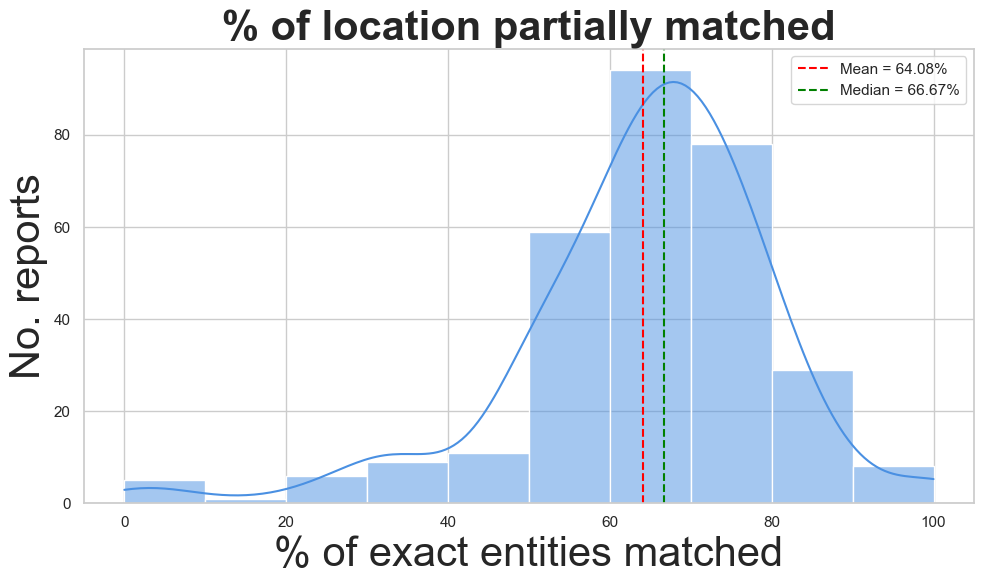

In [8]:
plot_distrib(locations_results, 'result_percentage_partial', "% of location partially matched")

Descriptive Statistics:

count    300.000
mean       0.793
std        0.157
min        0.033
25%        0.737
50%        0.818
75%        0.882
max        1.000
Name: result_percentage_potential_positive, dtype: float64


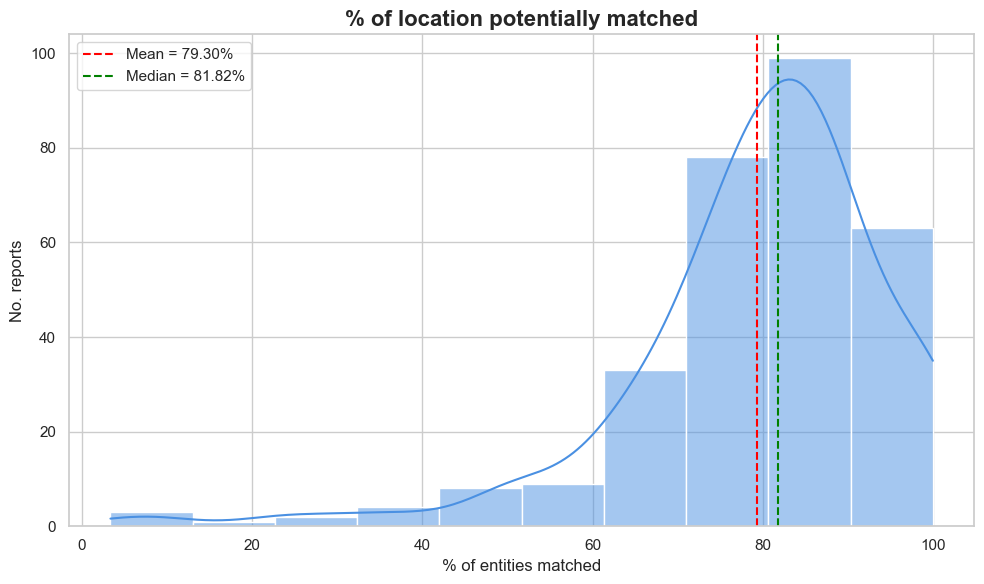

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = locations_results.copy()
col = 'result_percentage_potential_positive'
desc_stats = locations_results[col].describe()
print("Descriptive Statistics:\n")
print(desc_stats.round(3))

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

df[col] = df[col]*100
sns.histplot(df[col], bins=10, kde=True, color="#4A90E2", edgecolor="white")

# --- Add Mean & Median Lines ---
mean_val = df[col].mean()
median_val = df[col].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}%')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}%')

# --- Labels & Styling ---
plt.title("% of location potentially matched", fontsize=16, weight='bold')
plt.xlabel("% of entities matched", fontsize=12)
plt.ylabel("No. reports", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


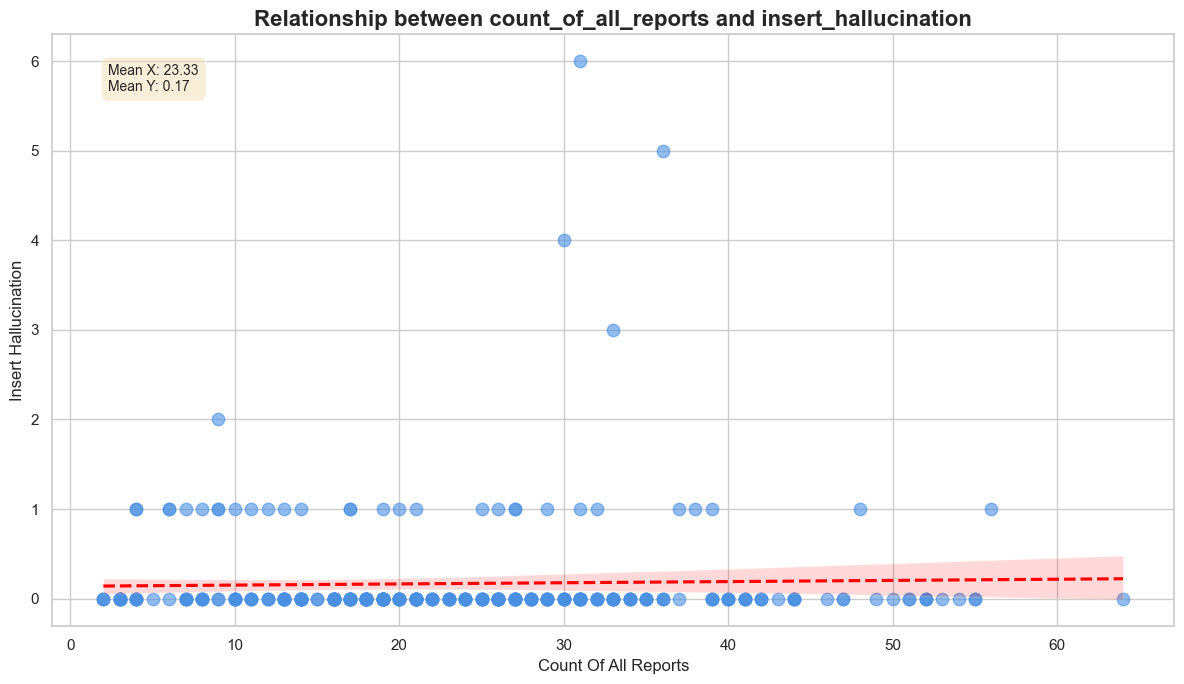

Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: count_of_all_reports, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       0.167
std        0.611
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        6.000
Name: insert_hallucination, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


y_axis_col= 'insert_hallucination'
x_axis_col = 'count_of_all_reports'
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, 
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)
x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()
print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


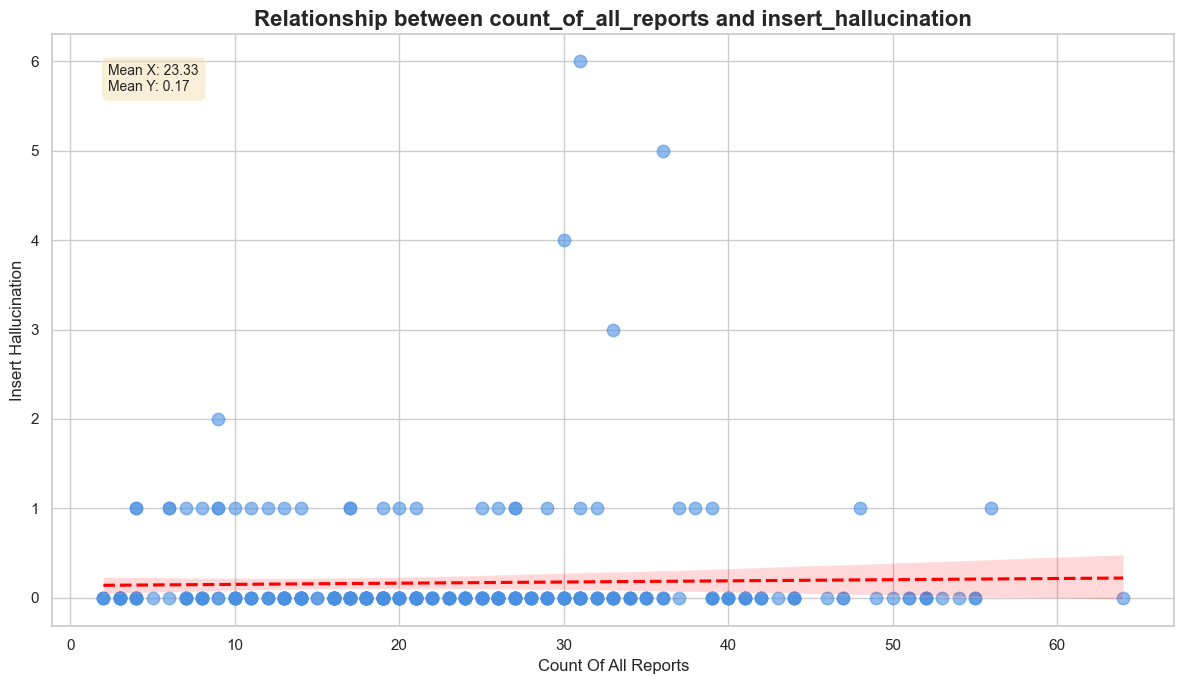

Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: count_of_all_reports, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       0.167
std        0.611
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        6.000
Name: insert_hallucination, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


y_axis_col= 'insert_hallucination'
x_axis_col = 'count_of_all_reports'

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, 
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)

x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()
print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


In [12]:
locations_results['precision'] = locations_results['positive'] / (locations_results['potential_positive'] + locations_results['insert_all'])
locations_results['part_precision'] = locations_results['potential_positive'] / (locations_results['potential_positive'] + locations_results['insert_all'])
locations_results['max_precision'] = (locations_results['potential_positive'] +  locations_results['insert_but_in_text']  )/ (locations_results['potential_positive'] + locations_results['insert_all']) # since insert_all = insert_hall + insert_in_text

In [13]:
locations_results['recall'] = locations_results['positive'] / (locations_results['missing'] + locations_results['potential_positive'])
locations_results['part_recall'] = locations_results['potential_positive'] / (locations_results['potential_positive'] + locations_results['missing'])
locations_results['max_recall'] = (locations_results['potential_positive']  + locations_results['insert_but_in_text'])/ (locations_results['potential_positive']+locations_results['insert_but_in_text'] + locations_results['missing'])


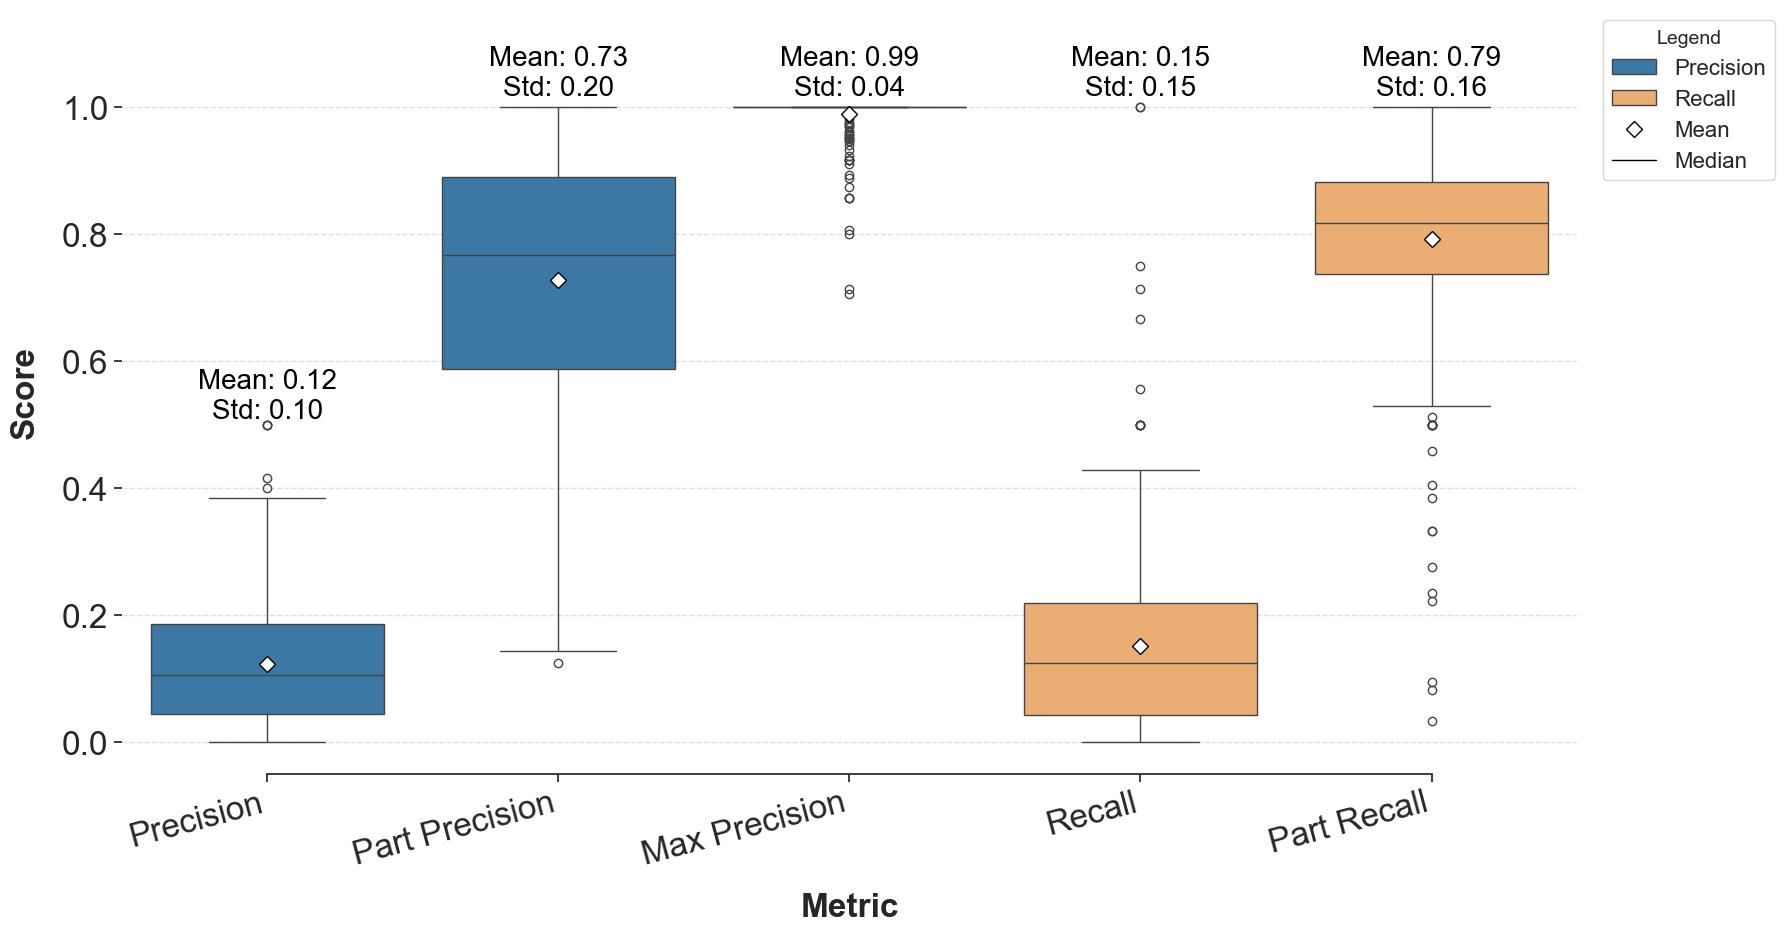

In [15]:
from utils.ploting import create_professional_boxplot
metrics_cols = ['precision', 'part_precision', 'max_precision', 'recall', 'part_recall'] 
create_professional_boxplot(locations_results, metrics_cols, "", "", "locations")

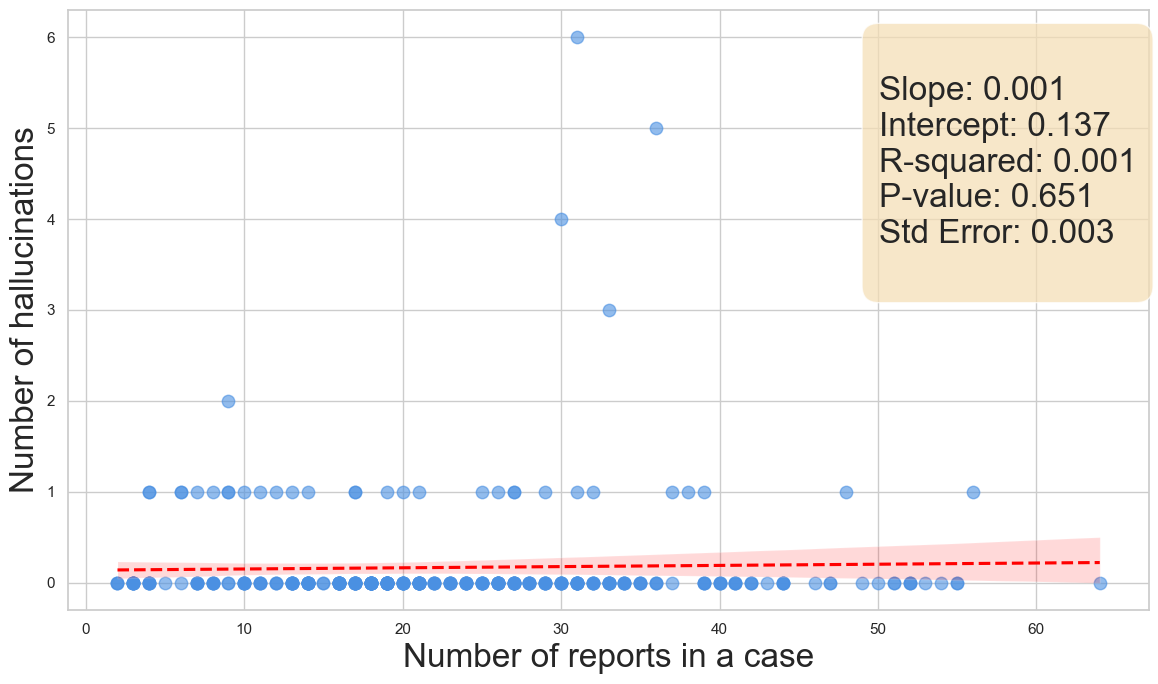

      Regression Statistics
Slope: 0.0013
Intercept: 0.1372
R-value (Correlation Coefficient): 0.0263
R-squared: 0.0007
P-value: 0.6515
Standard Error of the Estimate: 0.0029


Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       0.167
std        0.611
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        6.000
Name: insert_hallucination, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = locations_results.copy()
y_axis_col= 'insert_hallucination'
x_axis_col = 'number_of_all_reports_in_a_case'


clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

plt.xlabel('Number of reports in a case', fontsize=24)
plt.ylabel('Number of hallucinations', fontsize=24)

stats_text = f"""
Slope: {slope:.3f}
Intercept: {intercept:.3f}
R-squared: {r_squared:.3f}
P-value: {p_value:.3f}
Std Error: {std_err:.3f}
"""


plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=24,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

plt.tight_layout()
plt.savefig("utils/plots2/loc_hall.svg", bbox_inches='tight')

plt.show()
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))
